<a href="https://colab.research.google.com/github/KushalChakraborty1995/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_By_Kushal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 

$\color{green}{\text{NETFLIX MOVIES AND TV SHOWS CLUSTERING}}$



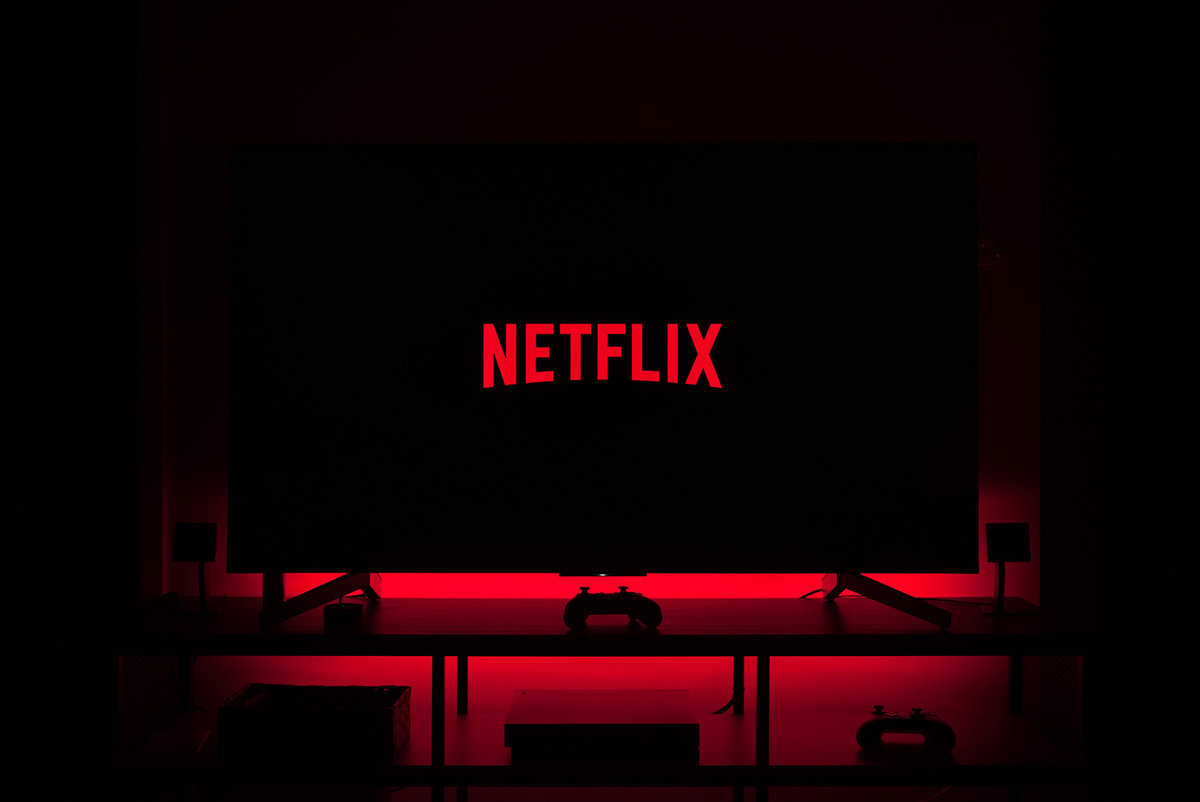

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  $\color{red}{\text{Kushal Chakraborty}}$


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/KushalChakraborty1995/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.**

**In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

**Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.** 

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split, KFold

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
#Mounting Google Drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
file_path='/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

In [4]:
#Reading the csv file
df=pd.read_csv(file_path)

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [9]:
print(f'We have {df.duplicated().sum()} duplicated value in the Dataset. Hurrahh!!!')

We have 0 duplicated value in the Dataset. Hurrahh!!!


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'Missing Values')

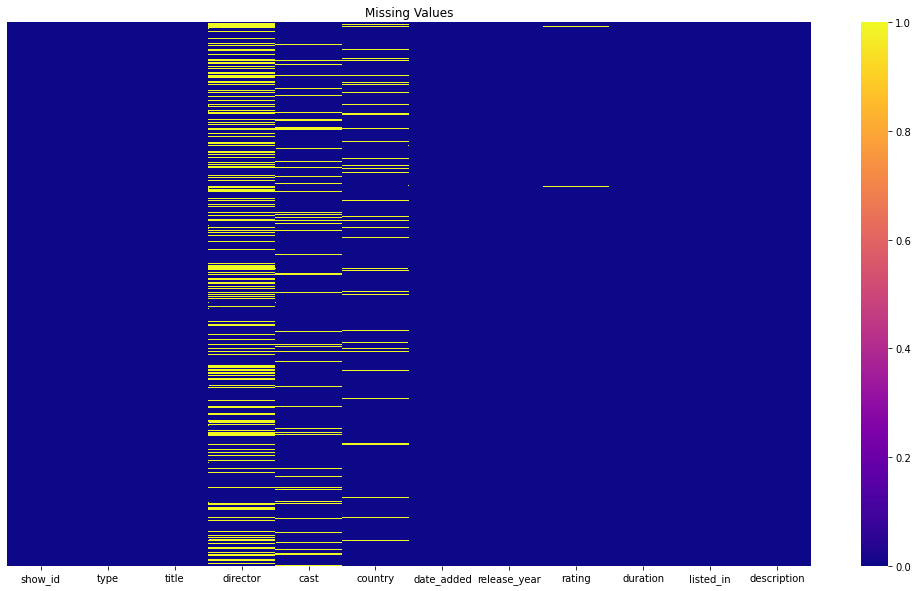

In [11]:
# Visualizing the missing values

plt.figure(figsize=(18,10))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title('Missing Values')

### What did you know about your dataset?

**There are null/missing values in director, cast, country, date_added, rating columns.**

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description 

* **show_id** : Unique ID for every Movie / Tv Show

* **type** : Identifier - A Movie or TV Show

* **title** : Title of the Movie / Tv Show

* **director** : Director of the Movie

* **cast**: Actors involved in the movie / show

* **country** : Country where the movie / show was produced

* **date_added** : Date it was added on Netflix

* **release_year** : Actual Releaseyear of the movie / show

* **rating** : TV Rating of the movie / show

* **duration**: Total Duration - in minutes or number of seasons

* **listed_in** : Genere

* **description**: The Summary description

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [15]:
# Checking Unique Values for each variable.
variables_df = df.columns.to_list()

In [16]:
for i in variables_df:
  print('The Unique Values of', i, 'are:', df[i].unique())

The Unique Values of show_id are: ['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
The Unique Values of type are: ['TV Show' 'Movie']
The Unique Values of title are: ['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
The Unique Values of director are: [nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
The Unique Values of cast are: ['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']
The Unique Va

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.

df['rating'].replace(np.nan, 'TV-MA',inplace  = True)
df['country'].replace(np.nan, 'United States',inplace  = True)
df['cast'].replace(np.nan, 'Missing info',inplace  = True)
df['director'].replace(np.nan, "Unknown",inplace  = True)

df = df[df['date_added'].notna()]

### What all manipulations have you done and insights you found?

* **Rating & Country** - As rating column has 0.08% null values , so replacing nulls with mose frequent TV-MA rating and doing same thing with country column

* **Cast**  - cast column has too many different values and more than 9% are missing, so there is no need to keep it but we are keeping it to perform EDA.

* **Date**  - there are few missing values for date column. so, lets drop missing value rows.

* **Director** - Director column has more then 30% null values ,I replace those missing values with the text "Unknown".

In [18]:
# Readjusting date added column and adding new features
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

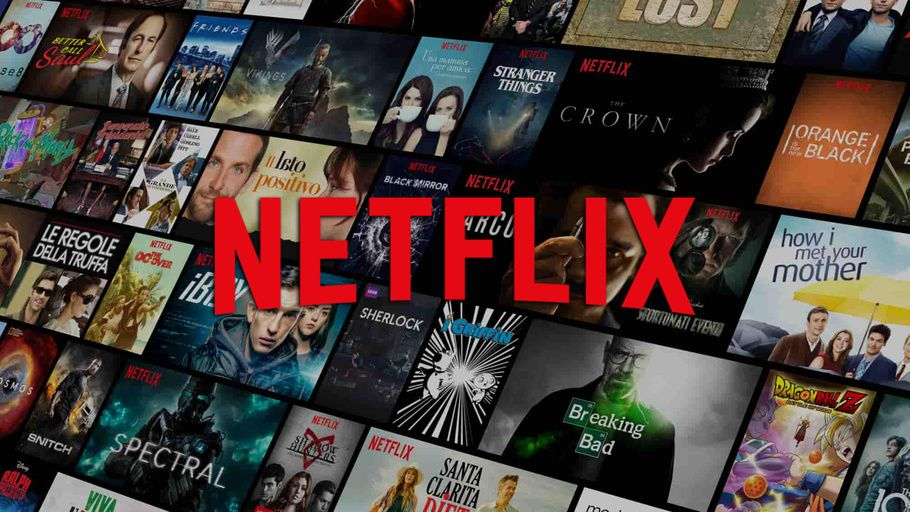

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

**Type of Netflix Content**

In [19]:
# Chart - 1 visualization code
x = df['type'].value_counts().reset_index()
colors=['DodgerBlue','red']
fig = px.pie(x,title='Type of Netflix Content',values='type',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
              marker=dict(colors=colors, line=dict(color='#000000', width=2)))

##### 1. Why did you pick the specific chart?

To check types of netflix content.

##### 2. What is/are the insight(s) found from the chart?


* It is evident that there are more movies on Netflix than TV shows.
* Netflix has 5377 movies, which is more than double the quantity of TV shows.
* There are about 70% movies and 30% TV shows on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide which type of content to make most.

#### Chart - 2

**Country where the movie / show was most produced**

In [20]:
# Chart - 2 visualization code
country = df['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 5)))
fig.show()

##### 1. Why did you pick the specific chart?

To check Country where the movie / show was most produced.

##### 2. What is/are the insight(s) found from the chart?

Clearly United states leads the chart followed by India and U.K.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide to release in which country to make more profit.

#### Chart - 3

**Total Releases for Last 10 Years**

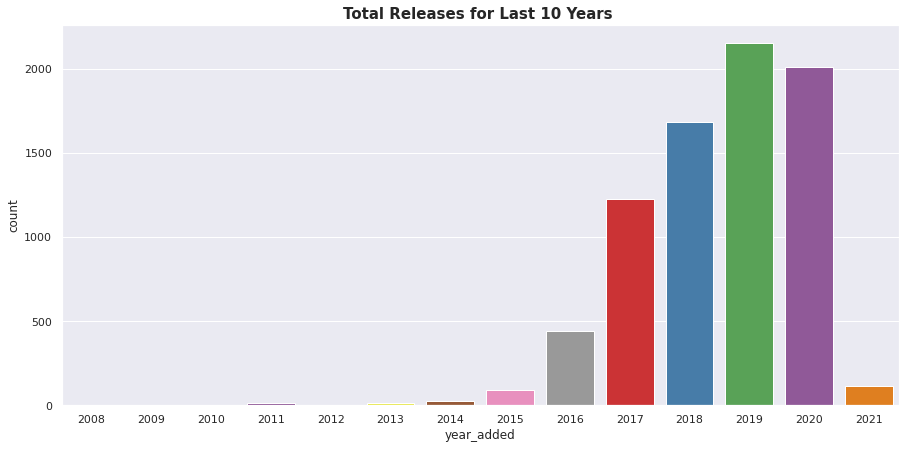

In [21]:
# Chart - 3 visualization code
# Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='year_added',data=df,palette="Set1")

plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()

##### 1. Why did you pick the specific chart?

To check the total Releases for Last 10 Years.

##### 2. What is/are the insight(s) found from the chart?

The number of releases have significantly increased after 2015 and have dropped in 2021 becase of Corona situation.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is just to check which year how many contents released.

#### Chart - 4

**Releases of Movies month-wise**

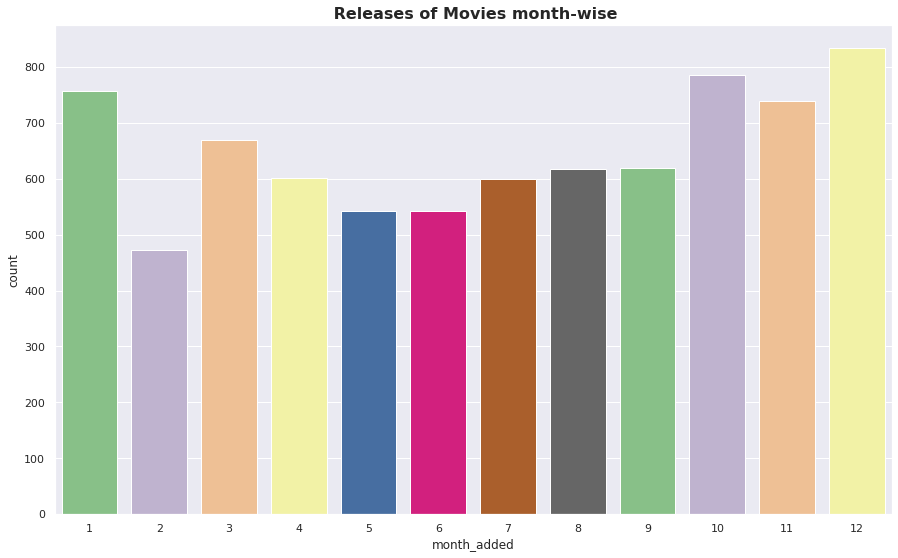

In [22]:
# Chart - 4 visualization code

sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='month_added',data=df,palette="Accent")

plt.title(' Releases of Movies month-wise',size='16',fontweight="bold")    
plt.show()

##### 1. Why did you pick the specific chart?

To check Releases of Movies month-wise.

##### 2. What is/are the insight(s) found from the chart?

As we can see more of the content is released in the months of October, November, December and January.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide which month to release to get more pofit and impact on audience.

#### Chart - 5

**Type and Ratings**

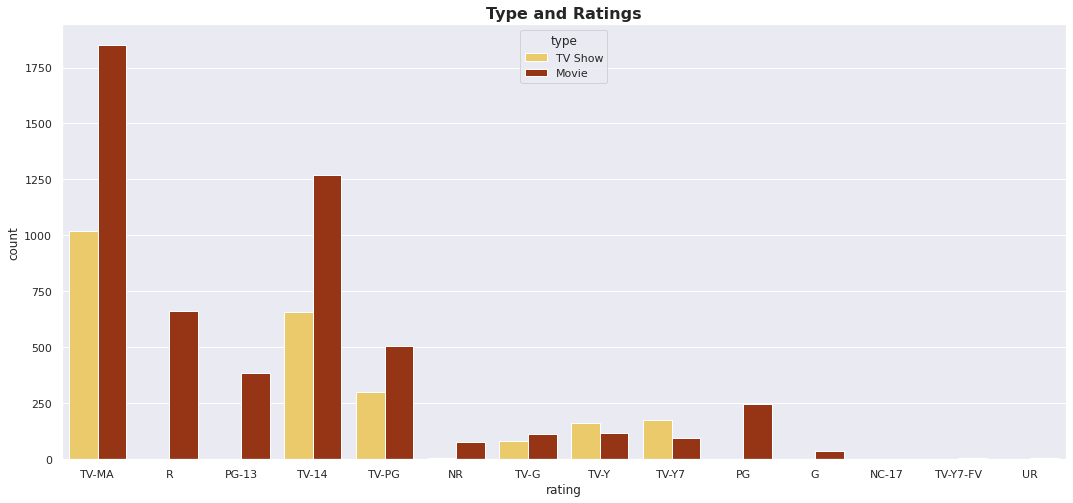

In [23]:
# Chart - 5 visualization code
plt.figure(figsize=(18,8))
sns.countplot(x='rating',hue='type',data=df,palette="afmhot_r")
plt.title('Type and Ratings',size='16',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

To check the types of shows and its ratings.

##### 2. What is/are the insight(s) found from the chart?

As you can see Tv mature audience got highest ratings for movies and also for shows. followed by R rated content for movies and kids tv shows for shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide which type of content to make most for profit.

#### Chart - 6

**Top 10 Genre in Movies**

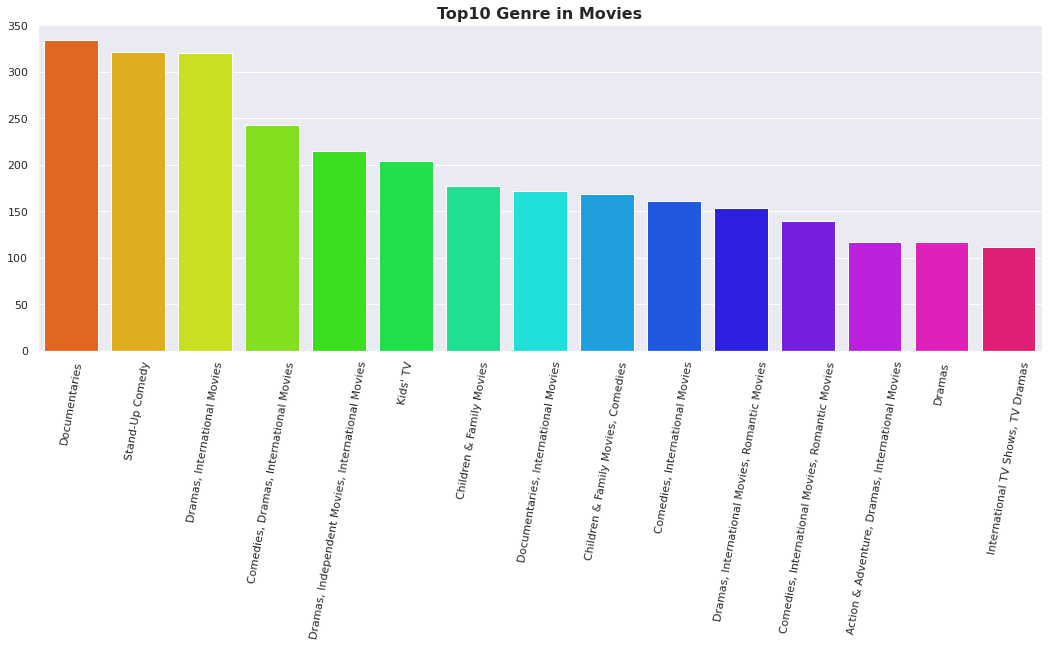

In [24]:
# Chart - 6 visualization code
plt.figure(figsize=(18,6))
sns.barplot(x = df["listed_in"].value_counts().head(15).index,
            y = df["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

To check the Top 10 Genre in Movies.

##### 2. What is/are the insight(s) found from the chart?

From the graph, we can tell that Documentaries take the first place, followed by Stand-up Comedy and Dramas,International Movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide which genre movies to make most.

**Here the Top 20 Genre in whole Netflix**

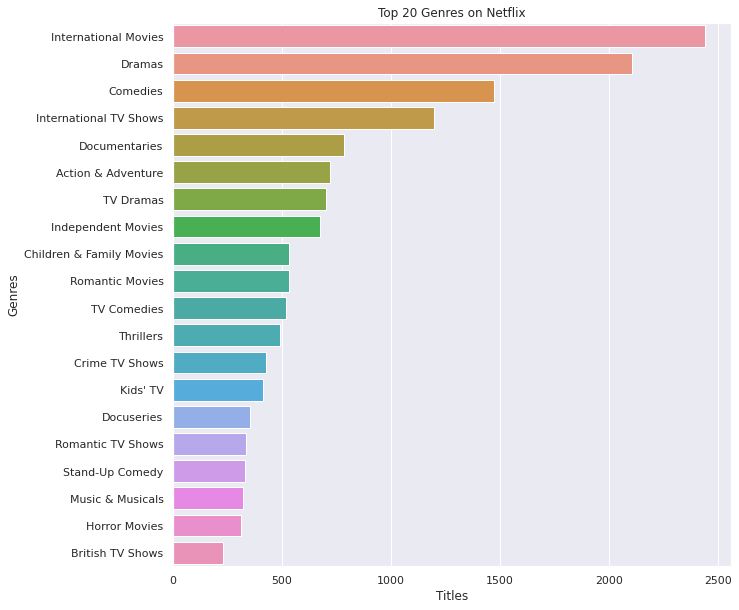

In [25]:
#Extract the Genres
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))

#Plot the count of top 20 genres
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

**As you can see on whole Netflix genre, International movies dominated the list closely followed by Dramas and comedy.**

#### Chart - 7

**Top-10 ACTORS on Netflix**

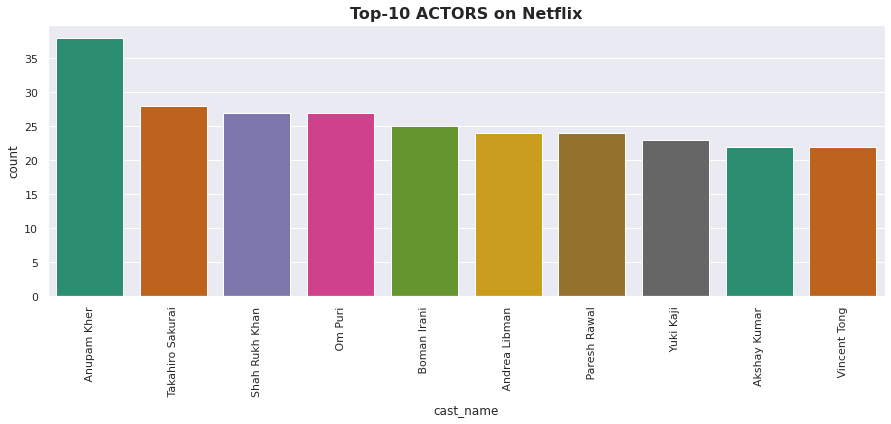

In [26]:
# Chart - 7 visualization code
df['cast_name'] = df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in df['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top-10 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To check the the Top 10 ACTORS on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The top actor on Netflix Movies, based on the number of titles, is Anupam Kher followed by Takahiro Sakurai ans Shahrukh Khan.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide which actor to cast in movies or shows to get more audience.

#### Chart - 8
**Most occured word in the Title**

In [27]:
#Importing WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

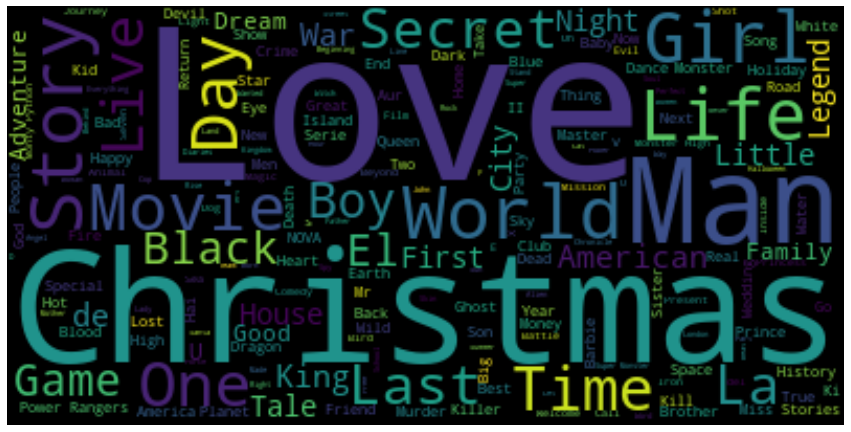

In [28]:
# Chart - 8 visualization code

df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

To check the most occured word in Title.

##### 2. What is/are the insight(s) found from the chart?

It seems like words like "Love", "Man", "World", "Story" , "Christmas" are very common in titles.

#### Chart - 9

**Movie Duration distribution**

In [29]:
movie_duration = df.loc[df['type'] == 'Movie',['type','duration']]               
movie_duration['duration'] = movie_duration['duration'].apply(lambda x : int(x.split()[0]))

Text(0.5, 1.0, 'Movie Duration')

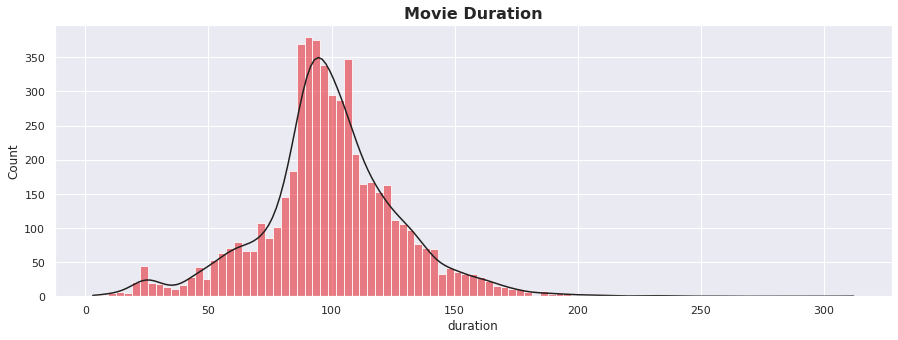

In [30]:
# Chart - 9 visualization code
plt.figure(figsize=(15,5))
ax = sns.histplot(x='duration',data=movie_duration,kde=True,color="#e50914")
ax.lines[0].set_color('#221f1f')
plt.title("Movie Duration",size='16',fontweight="bold")


##### 1. Why did you pick the specific chart?

To check the movie duration time.

##### 2. What is/are the insight(s) found from the chart?

* Above histogram plot, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense.

* Most content are about 70 to 120 min duration for movies

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide what time duration most movies should be to attract more audience.

#### Chart - 10

In [31]:
# Chart - 10 visualization code

In [32]:
direct=df.copy()
#removing unknown 
direct=direct[df['director']!='Unknown']

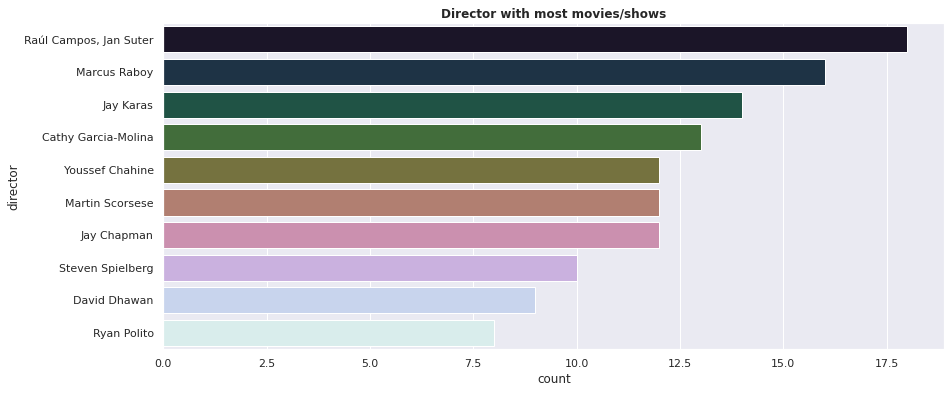

In [33]:
# Top 10 director whose content is available in netflix

plt.figure(figsize = (14,6))
sns.countplot(y='director',data=direct, order=direct['director'].value_counts().head(10).index,palette='cubehelix')
plt.title('Director with most movies/shows',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

To check the Director with most movies/shows.

##### 2. What is/are the insight(s) found from the chart?

Raul Campos and Jan Suter collectively have the most content on Netflix followed by Marcus and Jay respectivly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. it will help us to choose the directors who have made more impactful shows or movies.

#### Chart - 14 - Correlation Heatmap

In [34]:
# Correlation Heatmap visualization

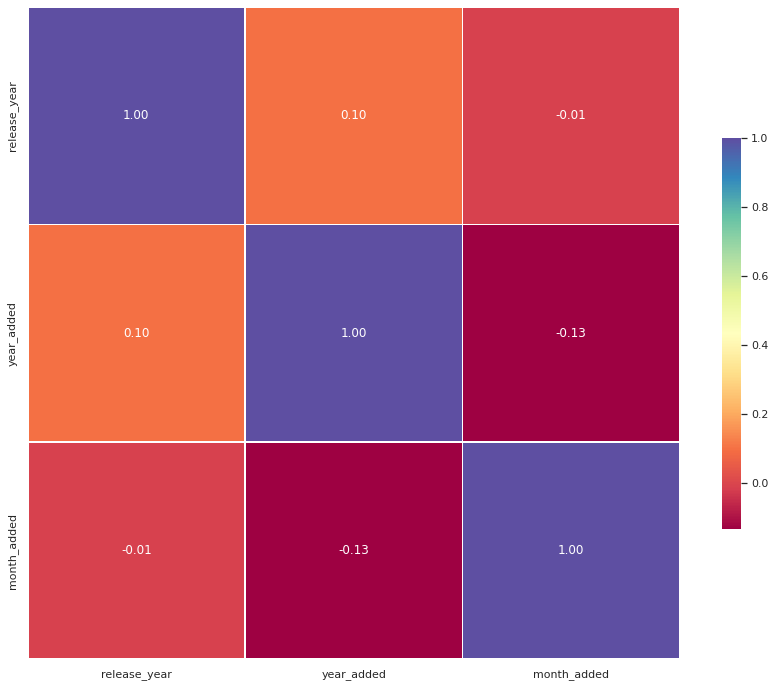

In [35]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap="Spectral", cbar_kws={'shrink': .6}, square=True, annot=True, fmt='.2f', linewidths=.8)
plt.show()

**Most of the columns of the dataset are of string type so those are not possible to plot a Correlation heatmap.**

#### Chart - 15 - Pair Plot 

In [36]:
# Pair Plot visualization code


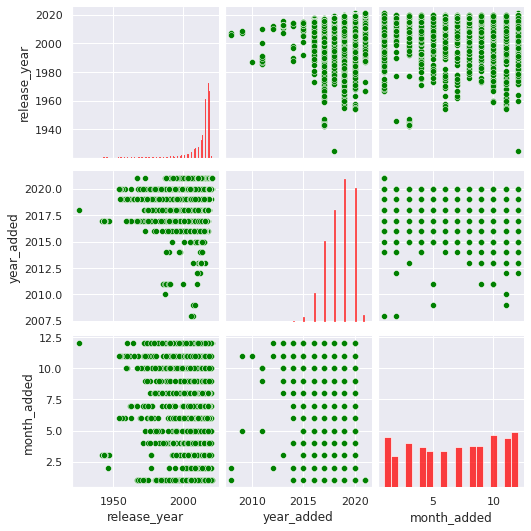

In [37]:
sns.pairplot(df,diag_kws={'color':'red'},plot_kws={'color':'green'})

**Most of the columns of the dataset are of string type so those are not possible to plot a Pair Plot.**

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

**The average duration of Movies released on Netflix is 90 min.**





#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis: N = 90**


**Alternate Hypothesis : N != 90**

In [38]:
# For Hypothesis
from scipy.stats import *
import math


In [39]:
# Parameter class

class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

In [40]:
#Calculating Variance and Z distribution

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value



def p_value(z,tailed):
  z = zcdf(z)
  if tailed=='l':
    return z
  elif tailed == 'r':
    return 1-z
  elif tailed == 'd':
    if z>0.5:
      return 2*(1-z)
    else:
      return 2*z
  else:
    return np.nan

In [42]:
# Conclusion about P-value

def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis."
  else:
    return f"Null Hypothesis rejected "

In [43]:

# Initializing the class
findz = findz()

**2. Perform an appropriate statistical test**

In [44]:
# Perform Statistical Test to obtain P-Value

hypo = df["duration"].str.extract('(\d+)').rename(columns={0:"duration"})

# Getting the required parameter values for hypothesis testing

hypothesis_number = 32

sample_mean = hypo["duration"].mean()

size = len(hypo["duration"])

std = (variance(pd.to_numeric(hypo["duration"])))**0.5

In [45]:
# Getting Z value

z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value

p = p_value(z = z, tailed='d')

# Getting Conclusion

print(conclusion(p))

Null Hypothesis rejected 


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis is rejected and The average duration of Movies released on Netflix is not 90 min.

##### Why did you choose the specific statistical test?

 **Z-Test** is used in hypothesis testing to evaluate whether a finding or association is statistically significant or not.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [46]:
# Handling Missing Values & Missing Value Imputation
#Already handled.

### 2. Handling Outliers

In [47]:
# Handling Outliers & Outlier treatments

**There aren't any outliers in the dataset as the column datatypes are of string format.**

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [48]:
# Encode your categorical columns

In [49]:

# Encoding columns
x = df[['type','country','director','release_year','rating']]


from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels 
for column in x:
  x[column]= label_encoder.fit_transform(x[column])
 
x.head()

,type,country,director,release_year,rating
0,1,39,3846,71,8
1,0,308,1840,67,8
2,0,379,1289,62,5
3,0,549,3445,60,4
4,0,549,3176,59,4


**There aren't any categorical columns in the dataset as the column datatypes are of string format.**

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [50]:
#We will be using text columns to create clusters for our data.

cluster_df = df[['title']]
df[['description','listed_in','director','cast','country','rating']]=df[['description','listed_in','director','cast','country','rating']].astype(str)
cluster_df['cluster_data'] = (df['description'] + ' ' + df['listed_in'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating'])
cluster_df.set_index('title', inplace = True)
cluster_df.head()
cluster_df.head()

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


#### 2. Lower Casing

In [51]:
# Lower Casing

#### 3. Removing Punctuations

In [52]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(2)

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...


#### 4. Removing URLs & Removing words and digits contain digits.

In [53]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [54]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [55]:
stop_words = set(stopwords.words('english'))

In [56]:
# Remove Stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head(2)

title
3%      future elite inhabit island paradise far crowd...
7:19    devastating earthquake hits mexico city trappe...
Name: cluster_data, dtype: object

#### 6. Rephrase Text

In [57]:
# Rephrase Text

#### 7. Tokenization

In [58]:
# Tokenization

In [ ]:
# We will add all categorical and text based columns
df_1 = df.copy()
df_1['text_info'] = df_1['listed_in'] +' '+ df_1['rating'] + ' ' + df_1['description'] + ' ' + df_1['director'] +

In [ ]:
# Applying Tokenization
def tokenizer(txt):  
  tokens = word_tokenize(txt) 
  return tokens
df_1['Processed Text'] = df_1['text_info'].apply(tokenizer)

#### 8. Text Normalization

In [59]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

In [60]:
# create an object of stemming function
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmet(text):    
    '''a function which stems each word in the given text'''
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(text)

In [61]:
import nltk
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [62]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lemmet)
cluster_df.head(2)

,cluster_data
title,
3%,future elite inhabit island paradise far crowd...
7:19,devastating earthquake hit mexico city trapped...


In [63]:
bag_of_words = cluster_df.cluster_data

##### Which text normalization technique have you used and why?

Answer Here.

#### 10. Text Vectorization

In [64]:
# Vectorizing Text
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [65]:
print(X.shape)

(7777, 20000)


In [66]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'ştar', 'şçil', 'şükrü'], dtype=object)

##### Which text vectorization technique have you used and why?

I used Bag-of-words(BoW) model which is a statistical language model,  to analyze text and documents based on word count.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [67]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [68]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [69]:
# Transform Your data

In [70]:
#creating new column name length
df['Length(description)'] = df['description'].apply(lambda x: len(x))

In [71]:
df['Listed_in'] = df['listed_in'].apply(lambda x : x.split(','))

In [72]:
df['no_of_category'] = df['Listed_in'] .apply(lambda x : len(x))
     

In [73]:
#new column for listed_in length
df['Length(listed-in)'] = df['listed_in'].apply(lambda x: len(x))
df[['description', 'Length(description)', 'listed_in' ,'Length(listed-in)' ]].head(3)

,description,Length(description),listed_in,Length(listed-in)
0,In a future where the elite inhabit an island ...,136,"International TV Shows, TV Dramas, TV Sci-Fi &...",54
1,After a devastating earthquake hits Mexico Cit...,148,"Dramas, International Movies",28
2,"When an army recruit is found dead, his fellow...",149,"Horror Movies, International Movies",35


In [74]:
df[['description','listed_in','no_of_category' ,'Length(description)','Length(listed-in)']].head(3)

,description,listed_in,no_of_category,Length(description),Length(listed-in)
0,In a future where the elite inhabit an island ...,"International TV Shows, TV Dramas, TV Sci-Fi &...",3,136,54
1,After a devastating earthquake hits Mexico Cit...,"Dramas, International Movies",2,148,28
2,"When an army recruit is found dead, his fellow...","Horror Movies, International Movies",2,149,35


In [75]:
#features taking for clustering
X_features_rec = df[['no_of_category' ,'Length(description)','Length(listed-in)']]
X_features_rec.describe()                                                   #summary of x_features
     

,no_of_category,Length(description),Length(listed-in)
count,7777.000000,7777.000000,7777.000000
mean,2.192491,143.099524,33.353607
std,0.786070,10.617986,15.028358
min,1.000000,61.000000,6.000000
25%,2.000000,140.000000,23.000000
50%,2.000000,146.000000,34.000000
75%,3.000000,149.000000,47.000000
max,3.000000,248.000000,79.000000


### 6. Data Scaling

In [76]:
# Scaling your data

In [77]:
#scaling x features
stdscaler = preprocessing.StandardScaler()
X_rescale=stdscaler.fit_transform(X_features_rec)
X=X_rescale 

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [78]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [79]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [80]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [83]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

In [84]:
#store silhouette score corresponding no. of clusters
no_cluster_silhouette_score = {}

For n_clusters = 2 The average silhouette_score is : 0.47736732679100613
For n_clusters = 3 The average silhouette_score is : 0.4704054286636499
For n_clusters = 4 The average silhouette_score is : 0.5055967447798905
For n_clusters = 5 The average silhouette_score is : 0.5181725529122087
For n_clusters = 6 The average silhouette_score is : 0.527751938165944
For n_clusters = 7 The average silhouette_score is : 0.5242550904903446
For n_clusters = 8 The average silhouette_score is : 0.49099031280656324
For n_clusters = 9 The average silhouette_score is : 0.4485298443119004
For n_clusters = 10 The average silhouette_score is : 0.43824640148346916
For n_clusters = 11 The average silhouette_score is : 0.4001338758511322
For n_clusters = 12 The average silhouette_score is : 0.4038483903787579
For n_clusters = 13 The average silhouette_score is : 0.39911691410354766
For n_clusters = 14 The average silhouette_score is : 0.39751284331381137
For n_clusters = 15 The average silhouette_score is : 0

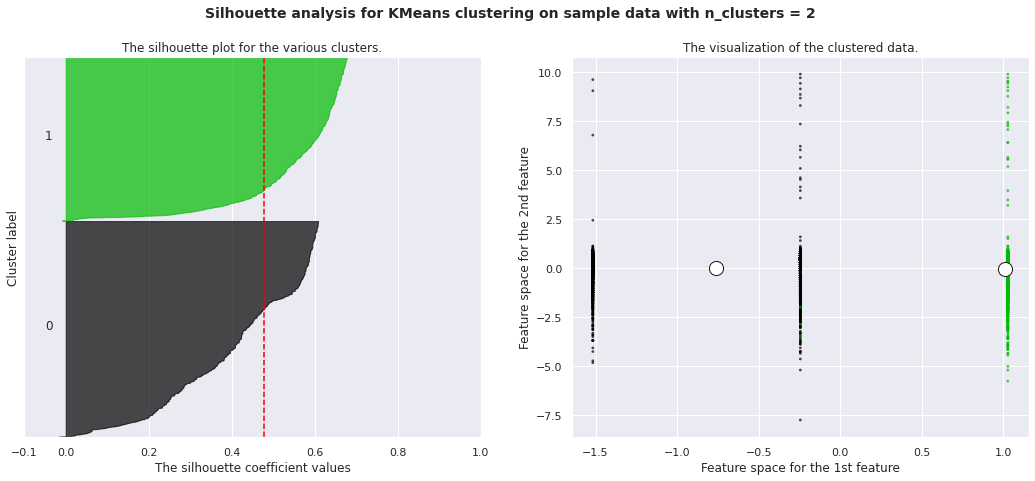

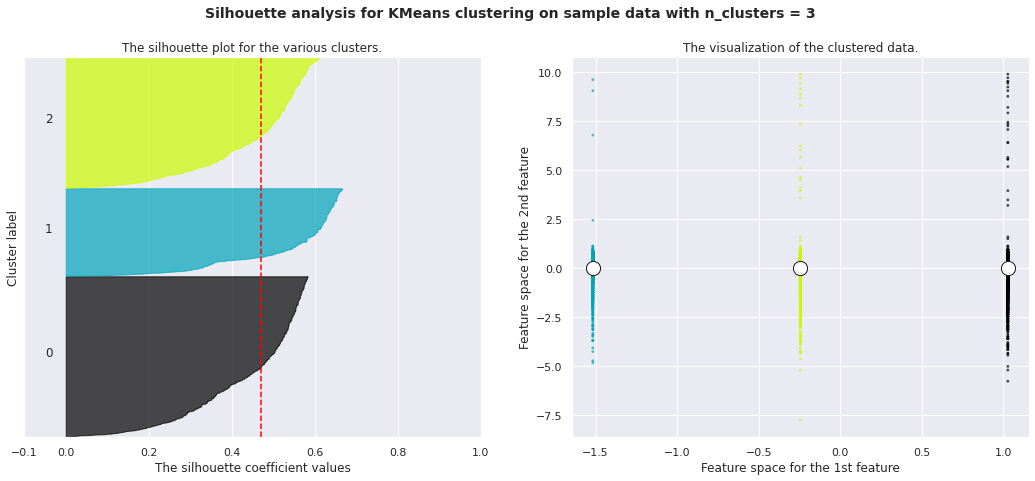

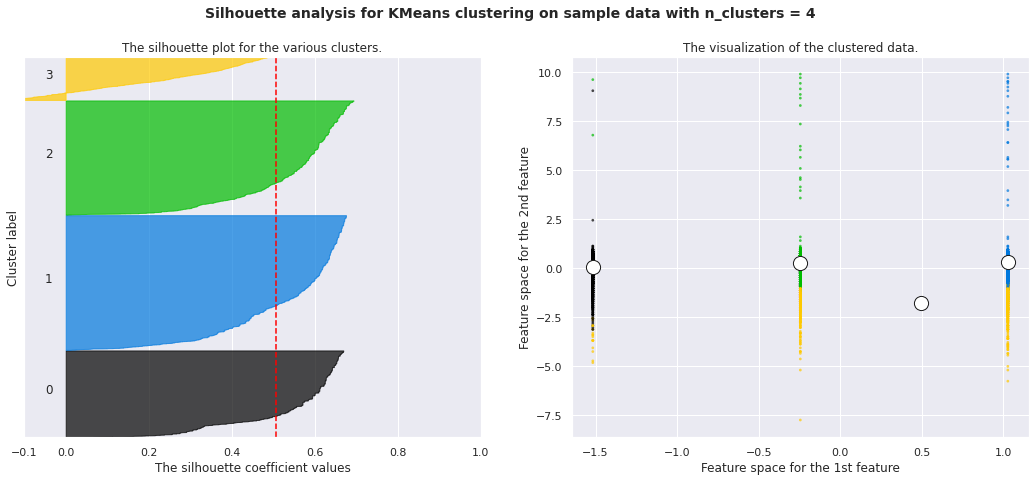

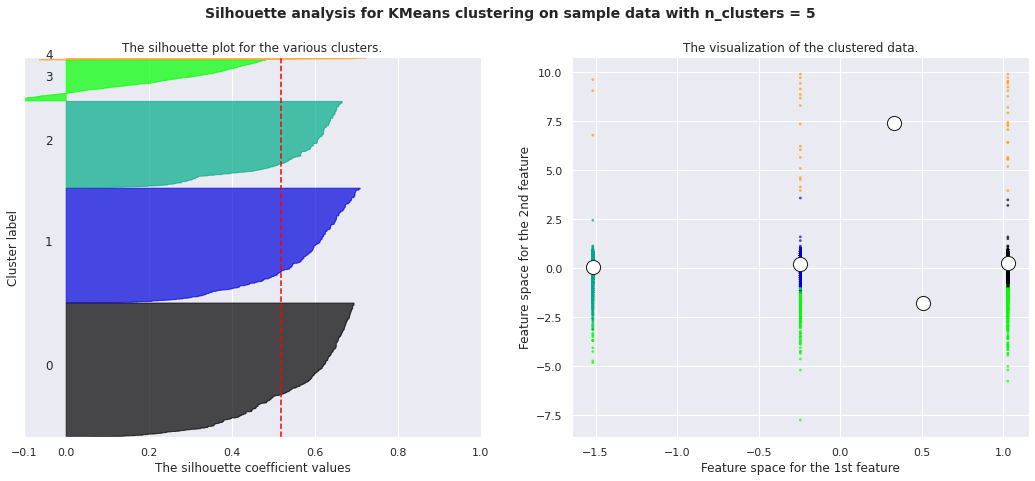

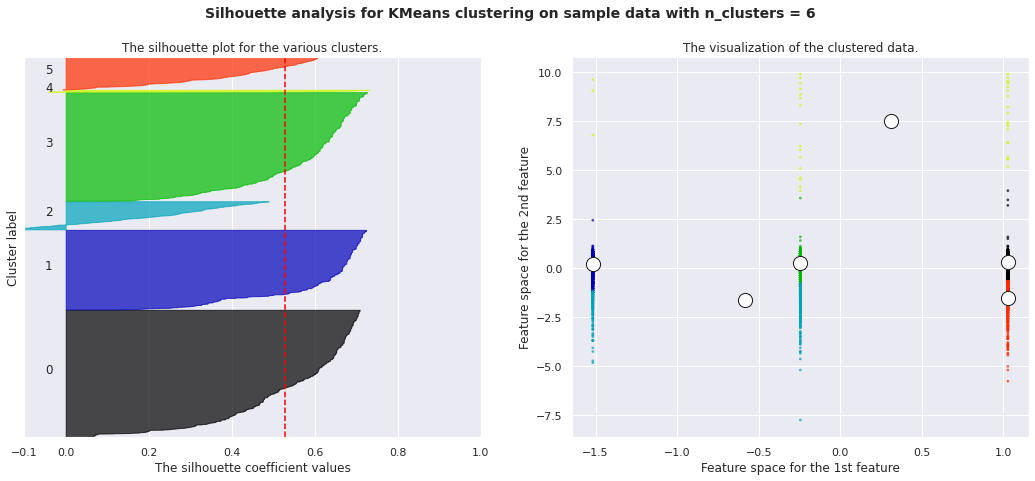

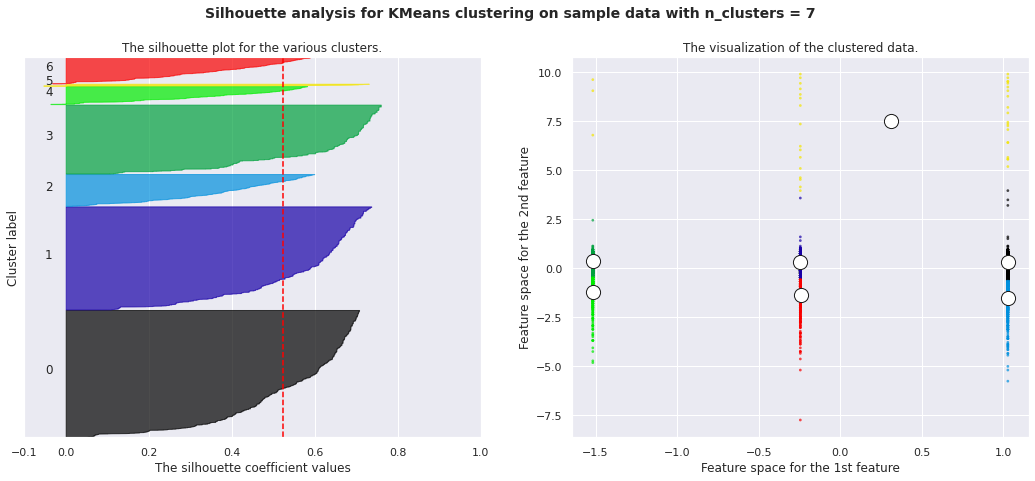

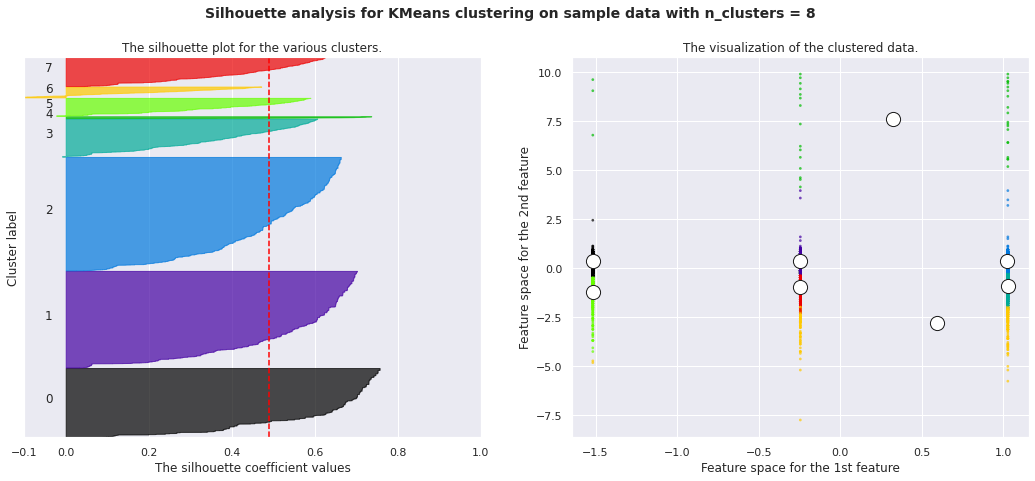

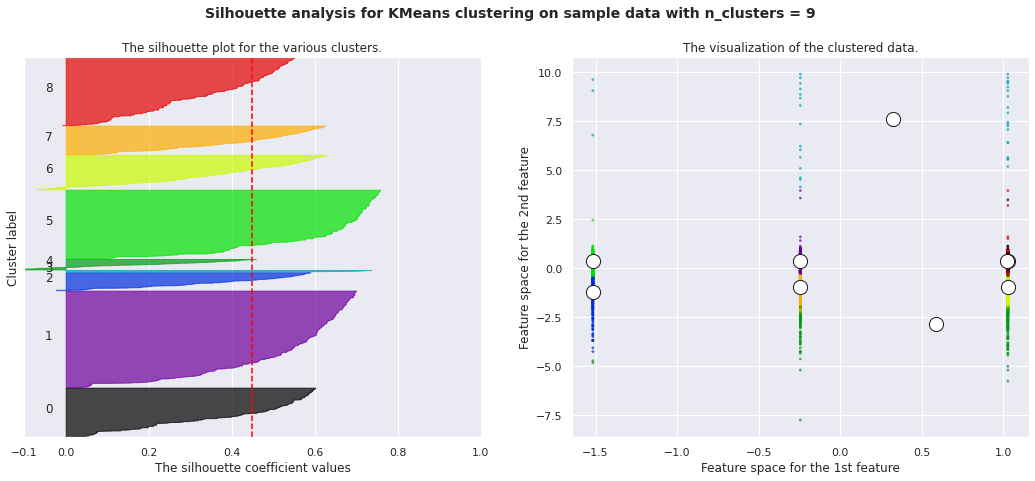

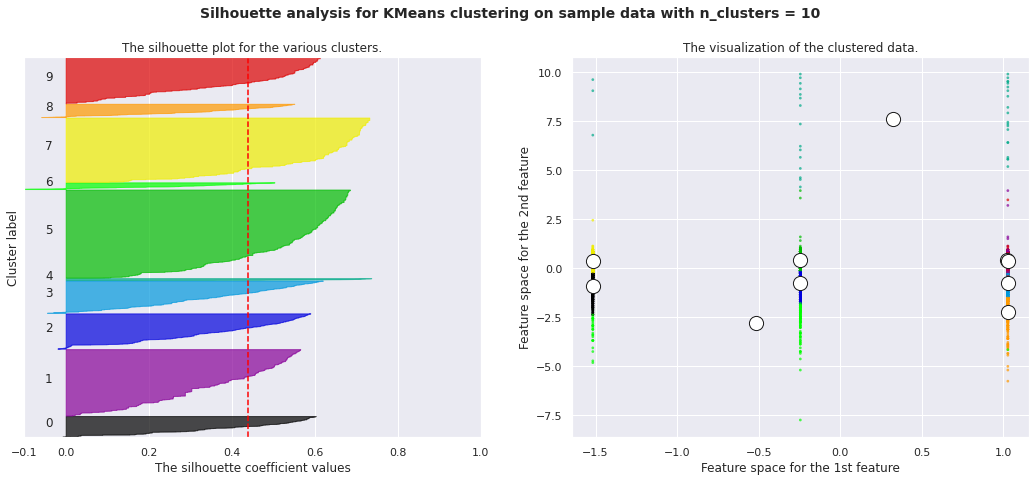

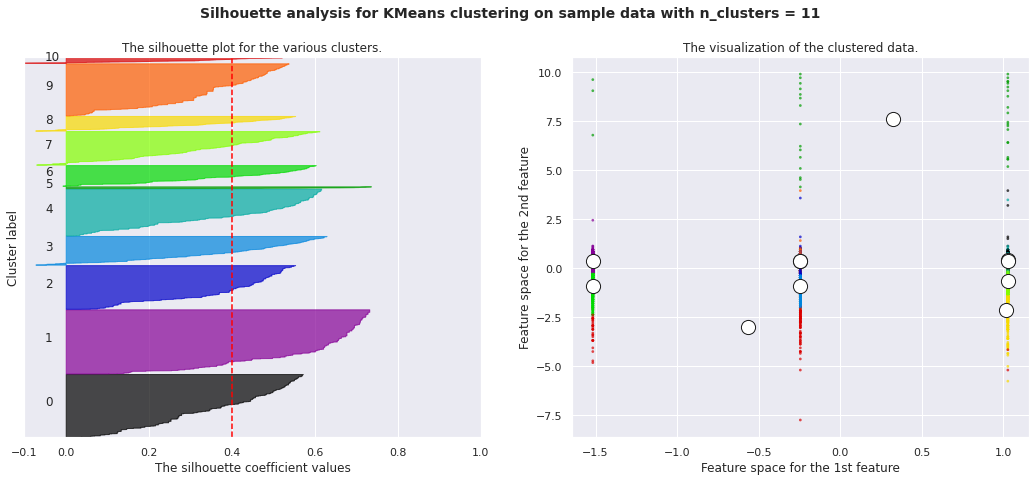

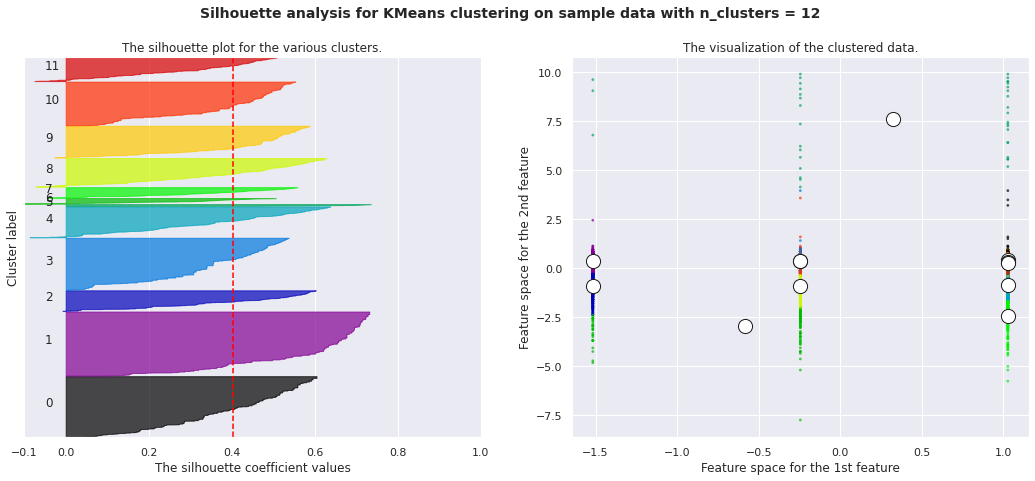

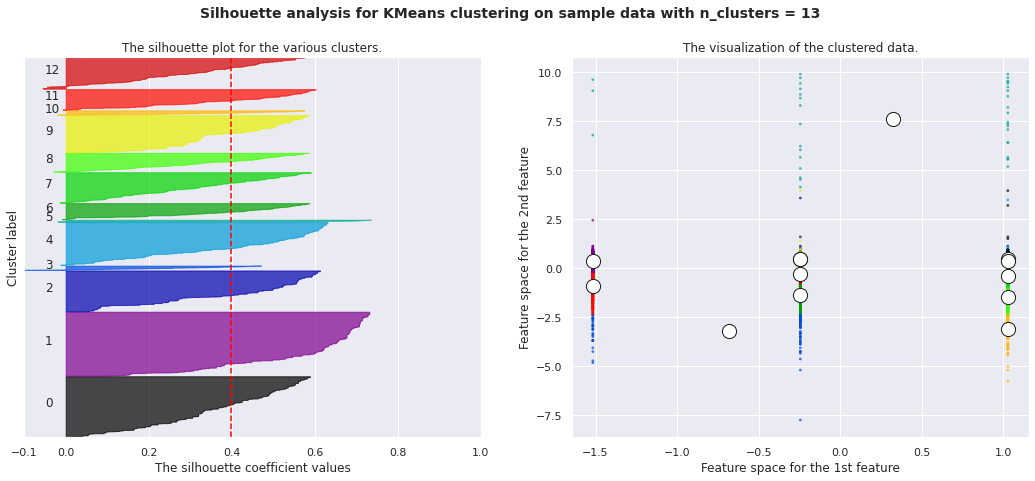

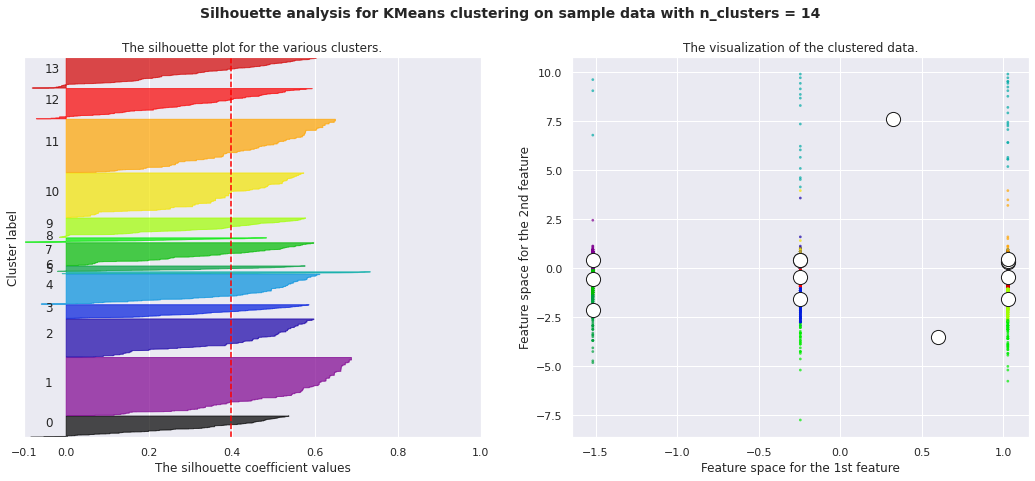

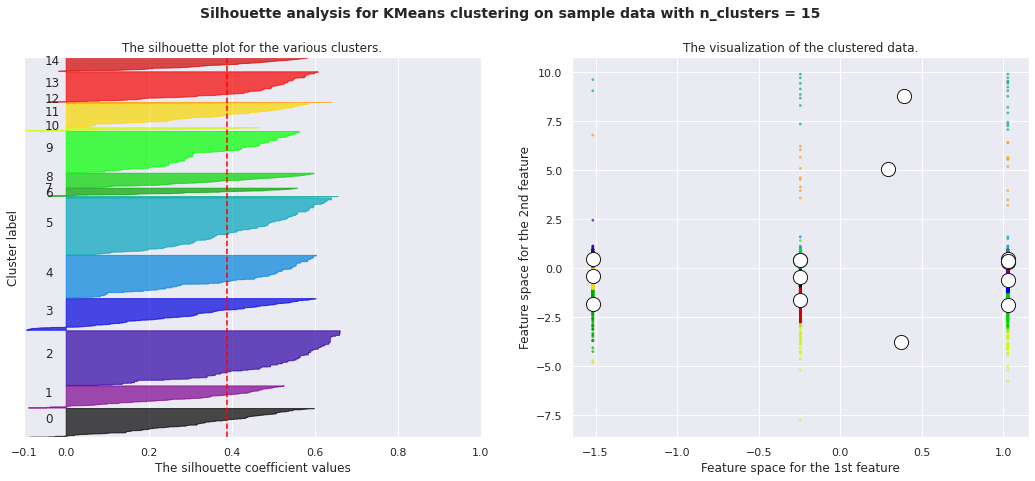

In [85]:
#range_n_clusters = [2, 3, 4, 5, 6]
range_n_clusters = list(range(2,16))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    no_cluster_silhouette_score[n_clusters] = round(silhouette_avg,3)

    # Compute the silhouette scores for each sample
    from sklearn.metrics import silhouette_samples, silhouette_score
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')



    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [86]:
from prettytable import PrettyTable

In [87]:
columns = ['n_clusters','silhouette_score']                                #column_names 
myTable = PrettyTable()                                                    #creating object
myTable.add_column(columns[0],list(no_cluster_silhouette_score.keys()))    #n_clusters
myTable.add_column(columns[1],list(no_cluster_silhouette_score.values()))  #silhouette score
print(myTable)

+------------+------------------+
| n_clusters | silhouette_score |
+------------+------------------+
|     2      |      0.477       |
|     3      |       0.47       |
|     4      |      0.506       |
|     5      |      0.518       |
|     6      |      0.528       |
|     7      |      0.524       |
|     8      |      0.491       |
|     9      |      0.449       |
|     10     |      0.438       |
|     11     |       0.4        |
|     12     |      0.404       |
|     13     |      0.399       |
|     14     |      0.398       |
|     15     |       0.39       |
+------------+------------------+


In [88]:
print(no_cluster_silhouette_score)

{2: 0.477, 3: 0.47, 4: 0.506, 5: 0.518, 6: 0.528, 7: 0.524, 8: 0.491, 9: 0.449, 10: 0.438, 11: 0.4, 12: 0.404, 13: 0.399, 14: 0.398, 15: 0.39}


**Elbow Method**

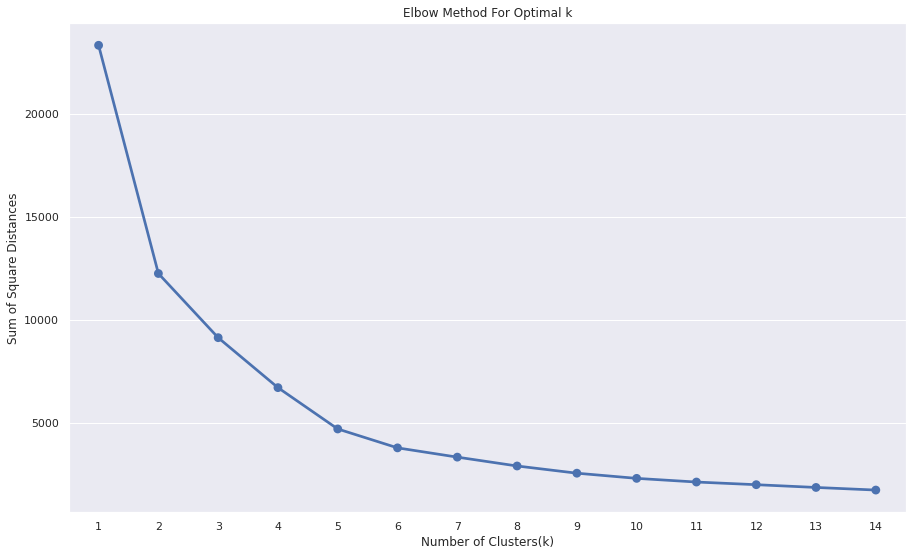

In [89]:
#Elbow Method For Optimal k
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Dendogram**

A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line).

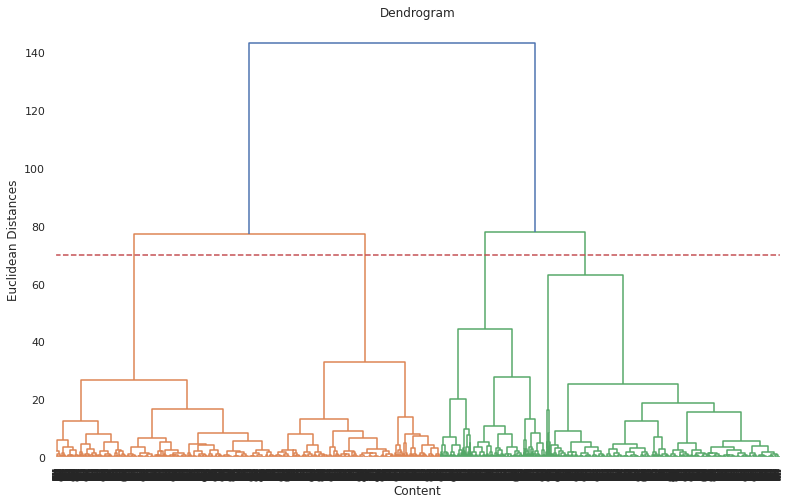

In [90]:
# Let's import sch
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.axhline(y=70,color='r', linestyle='--')
plt.show()                                # find largest vertical distance we can make without crossing any other horizontal line
     

**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.**

**No. of Cluster = 3** 






### ML Model - 2

**Agglomerative Clustering**


In [91]:
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

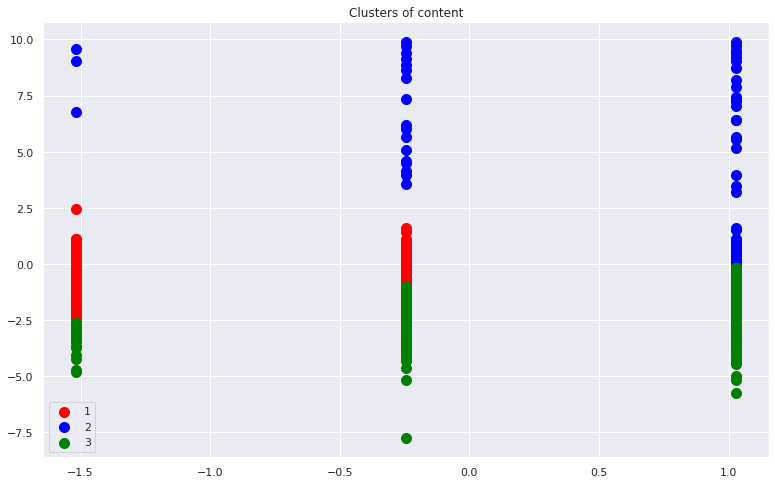

In [92]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')

plt.title('Clusters of content')

plt.legend()
plt.show()

In [93]:
np.unique(y_hc,return_counts=True)

(array([0, 1, 2]), array([4135, 2507, 1135]))

### ML Model - 3

In [94]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

In [98]:
from sklearn.cluster import DBSCAN

In [99]:
dbscan = DBSCAN().fit(X)
preds = dbscan.labels_

In [100]:
db = DBSCAN(eps=0.5, min_samples=100).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 278


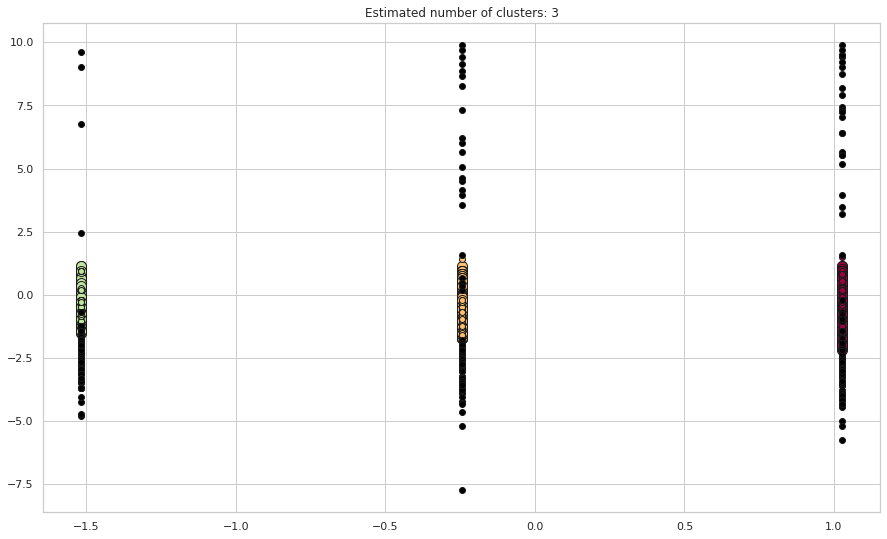

In [101]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [102]:
#word cloud for all content
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = df[['label',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['label']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

In [108]:
for i in range(10):
  func_select_Category(i,'listed_in')

KeyError: ignored

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [96]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

**1. It was interesting to find that majority of the content available on Netflix is Movies.**

**2. But in the recent years it has been focusing more on Tv-Shows.**


**3. United States and India are among the top 5 countries that produce all of the available content on the platform.**

**4. Also 6 of the actors among the top ten actors with maximum content are from India.**

**5. TV-MA tops the charts, indicating that mature content is more popular on Netflix.**


**6.By applying different clustering models like Kmeans, Agglomerative clustering on dataset we got the best cluster arrangements i.e optimal number of cluster is equal to 3 .**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***